In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [ ]:
# Read CSV
csvpath = "output_data/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df["Zipcode"] = census_df["Zipcode"].astype("category")
census_df

In [ ]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
for i in census_df.index:
    census_df.at[i,"% Black Population"] = 100*(census_df.at[i,"Black Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% White Population"] = 100*(census_df.at[i,"White Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Unemployed"]       = 100*(census_df.at[i,"Unemployed Count"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% Black Poverty"]   = 100*(census_df.at[i,"Poverty Count - Black"] / census_df.at[i,"Poverty Count"])
    census_df.at[i, "% White Poverty"]   = 100*(census_df.at[i,"Poverty Count - White"] / census_df.at[i,"Poverty Count"])
census_df

In [ ]:
# Create separate DFs for each county
oakland_data = pd.DataFrame(census_df.loc[census_df["County"] == "Oakland"])
kent_data = pd.DataFrame(census_df.loc[census_df["County"] == "Kent"])
saginaw_data = pd.DataFrame(census_df.loc[census_df["County"] == "Saginaw"])

# Ensure zipcodes are categorical
oakland_data["Zipcode"] = oakland_data["Zipcode"].astype("object")
kent_data["Zipcode"] = kent_data["Zipcode"].astype("object")
saginaw_data["Zipcode"] = saginaw_data["Zipcode"].astype("object")


In [ ]:
# Create summary statistics table with stats for each county (mean / median of each column)

# Income in Each County, by Zipcode **Jonathan**

In [ ]:
# Create scatter plot(s) for Income in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Home Values in Each County, by Zipcode **Tamica**

In [ ]:
# Create scatter plot(s) for Home Values in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Rent Prices in Each County, by Zipcode **Stephanie**

In [ ]:
# Create scatter plot(s) for Rent Prices in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Demographic Composition in Each County, by Zipcode **Rhi**

In [ ]:
# Create histogram for population distribution across zipcodes
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(311)
ax1.hist(oakland_data["Total Population"],color="green")
ax2 = fig.add_subplot(312,sharex=ax1, sharey=ax1)
ax2.hist(saginaw_data["Total Population"],color="blue")
ax3 = fig.add_subplot(313,sharex=ax1, sharey=ax1)
ax3.hist(kent_data["Total Population"],color="red")
ax1.text(.5,140,"Oakland County Population")
ax2.text(.5,140,"Saginaw County Population")
ax3.text(.5,140,"Kent County Population")
for ax in fig.get_axes():
    ax.set(xlabel="Population",ylabel="Count")
    ax.label_outer()
fig.suptitle("Population counts across zipcodes")
plt.show()

In [ ]:
# Create dataframes grouped by zipcode for zipcode analysis
oakland_grouped = oakland_data.groupby("Zipcode").median()
kent_grouped = kent_data.groupby("Zipcode").median()
saginaw_grouped = saginaw_data.groupby("Zipcode").median()

##  Oakland County Analyses

In [ ]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.bar(xaxis,oakland_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(oakland_grouped["Total Population"]-oakland_grouped["Black Population"]-oakland_grouped["White Population"]),
                       label=label,bottom=oakland_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,oakland_grouped["Black Population"],label=label,bottom=oakland_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Oakland County from 2011-2020")
plt.show()
##SAVE CHART

In [ ]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.bar(xaxis,oakland_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(oakland_grouped["Poverty Count"]-oakland_grouped["Poverty Count - Black"]-oakland_grouped["Poverty Count - White"]),
                       label=label,bottom=oakland_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,oakland_grouped["Poverty Count - Black"],label=label,bottom=oakland_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Oakland County from 2011-2020")
plt.show()

In [ ]:
def time_analyses_stacked(df,col1,col2,col_total,labels,county):
    for zipcode in df["Zipcode"].unique():
        max_y = 1.1*(df[col_total].max())
        filtered = df.loc[df["Zipcode"] == zipcode]
        filtered = filtered.sort_values(by=["Zipcode","Year"])
        filtered["Other"] = filtered[col_total]-filtered[col1]-filtered[col2]
        
        fig = plt.figure(figsize = (15,8))
        line1 = plt.bar(filtered["Year"],filtered[col2],color='c')
        line3 = plt.bar(filtered["Year"],filtered["Other"],bottom=filtered[col2],color='r')
        line2 = plt.bar(filtered["Year"],filtered[col1],bottom=filtered[col2],color='b')
        plt.legend([line1, line2,line3],labels)
        plt.xlabel("Year")
        plt.ylabel(col_total)
        ax.set(ylim = [0, max_y])
        plt.title(col_total + " in "  + str(zipcode) + ", " + county + " County from 2011-2020")
        plt.show()

In [ ]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(oakland_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Oakland")

In [ ]:
# Time analyses for population
time_analyses_stacked(oakland_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Oakland")

In [ ]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> 300)]
equations_df = pd.merge(equations_df,oakland_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 34000
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Oakland County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.show()

In [ ]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .9) & (abs(equations2_df["Slope"])> 50)]
equations2_df = pd.merge(equations2_df,oakland_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 4000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 200
plt.title("Poverty Rates in Oakland County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.show()

In [ ]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .75)]
equations_df = pd.merge(equations_df,oakland_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Oakland County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.show()

## Kent County Analyses

In [ ]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.bar(xaxis,kent_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(kent_grouped["Total Population"]-kent_grouped["Black Population"]-kent_grouped["White Population"]),
                       label=label,bottom=kent_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,kent_grouped["Black Population"],label=label,bottom=kent_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Kent County from 2011-2020")
plt.show()
##SAVE CHART

In [ ]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.bar(xaxis,kent_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(kent_grouped["Poverty Count"]-kent_grouped["Poverty Count - Black"]-kent_grouped["Poverty Count - White"]),
                       label=label,bottom=kent_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,kent_grouped["Poverty Count - Black"],label=label,bottom=kent_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Kent County from 2011-2020")
plt.show()

In [ ]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(kent_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Kent")

In [ ]:
# Time analyses for population
time_analyses_stacked(kent_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Kent")

In [ ]:
# Create initial plot ---Population
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> 400)]
equations_df = pd.merge(equations_df,kent_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Kent County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.show()

In [ ]:
# Create initial plot ---Poverty
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .85) & (abs(equations2_df["Slope"])> 40)]
equations2_df = pd.merge(equations2_df,kent_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 6000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 350
plt.title("Poverty Rates in Kent County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.show()

In [ ]:
# Create initial plot --Unemployment
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .58)]
equations_df = pd.merge(equations_df,kent_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Kent County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.show()

## Saginaw County Analyses

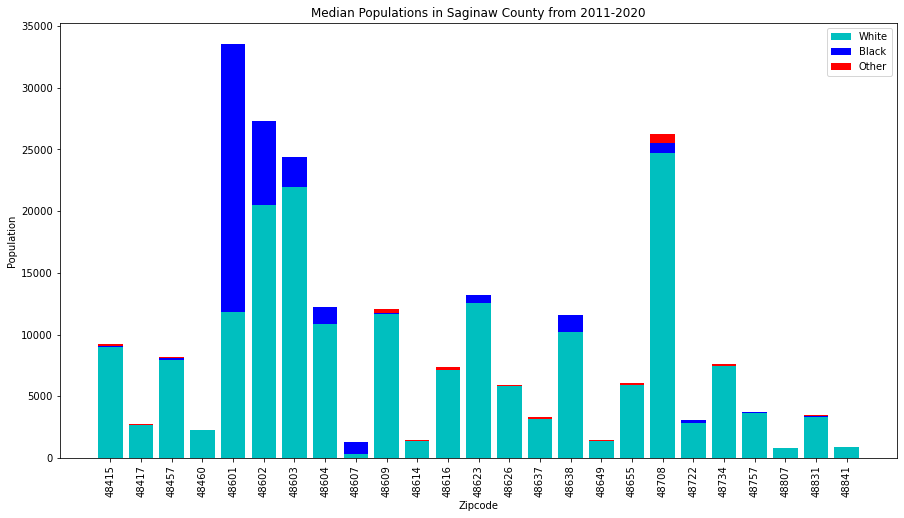

In [123]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.bar(xaxis,saginaw_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(saginaw_grouped["Total Population"]-saginaw_grouped["Black Population"]-saginaw_grouped["White Population"]),
                       label=label,bottom=saginaw_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,saginaw_grouped["Black Population"],label=label,bottom=saginaw_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Saginaw County from 2011-2020")
plt.show()
##SAVE CHART

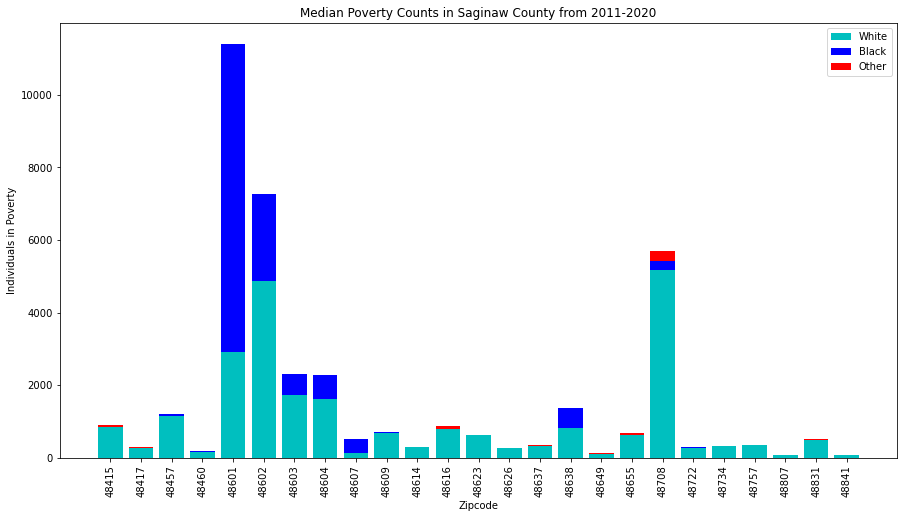

In [124]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.bar(xaxis,saginaw_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(saginaw_grouped["Poverty Count"]-saginaw_grouped["Poverty Count - Black"]-saginaw_grouped["Poverty Count - White"]),
                       label=label,bottom=saginaw_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,saginaw_grouped["Poverty Count - Black"],label=label,bottom=saginaw_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Saginaw County from 2011-2020")
plt.show()

<Figure size 504x288 with 0 Axes>

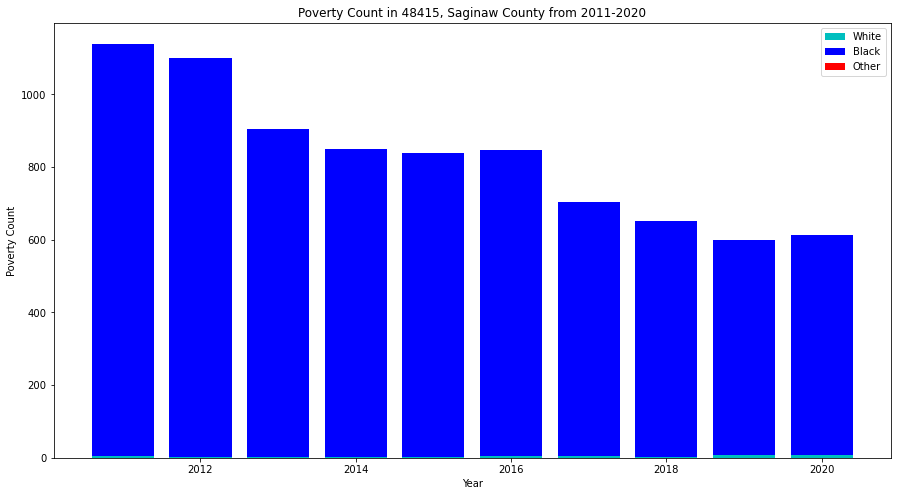

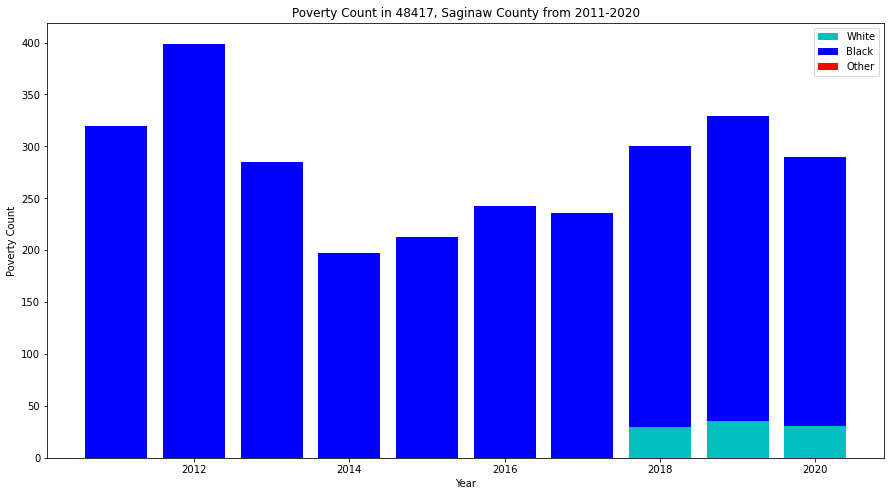

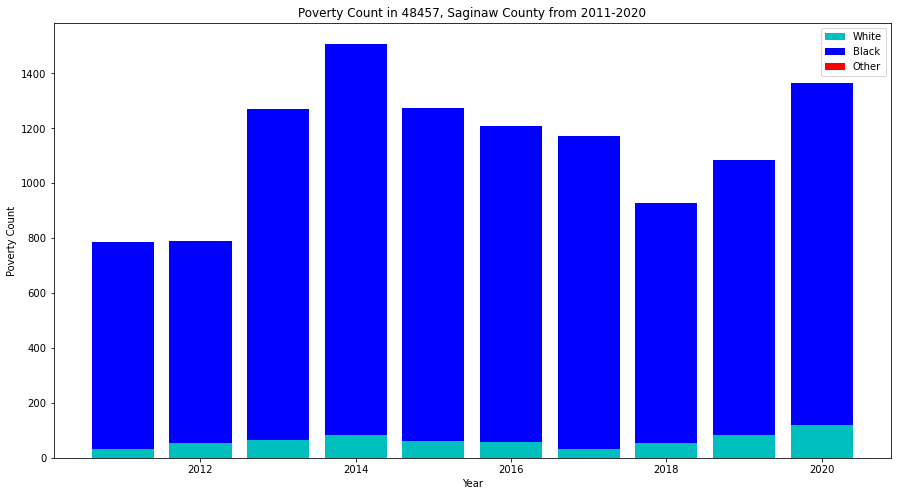

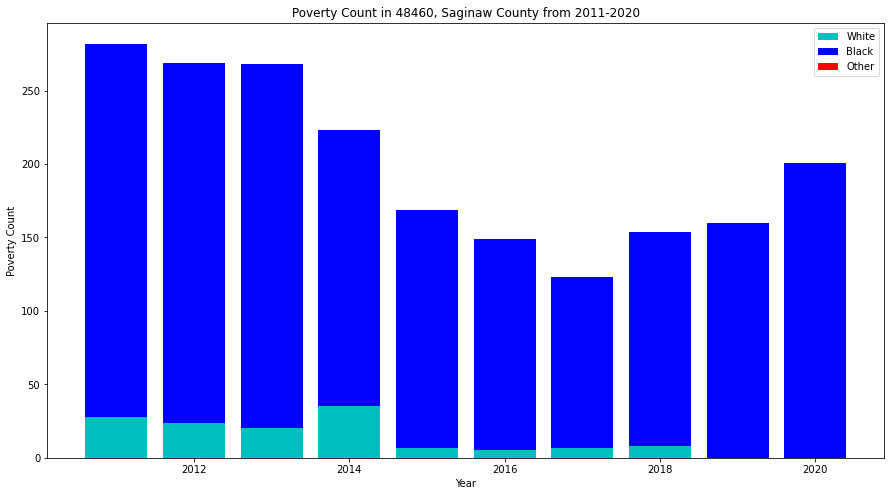

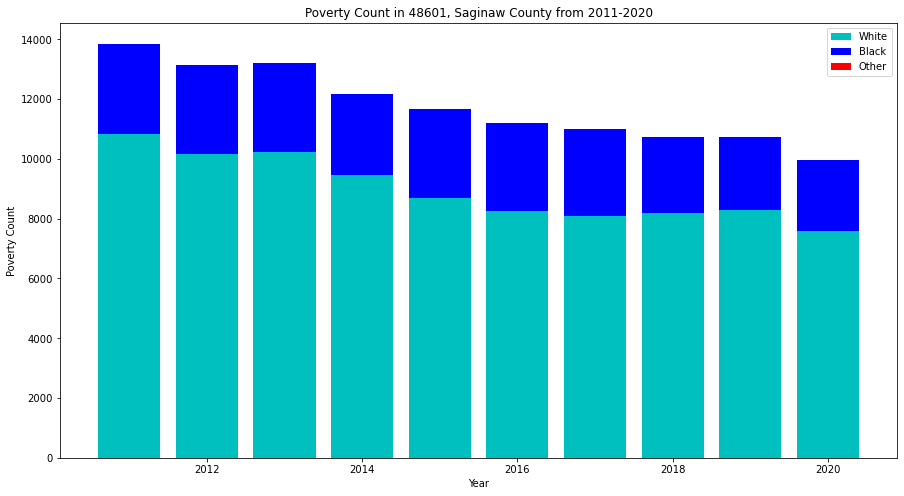

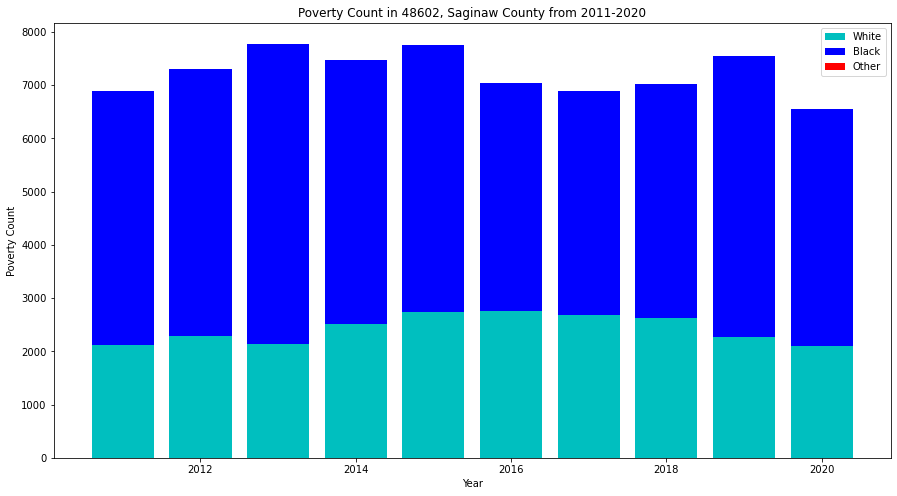

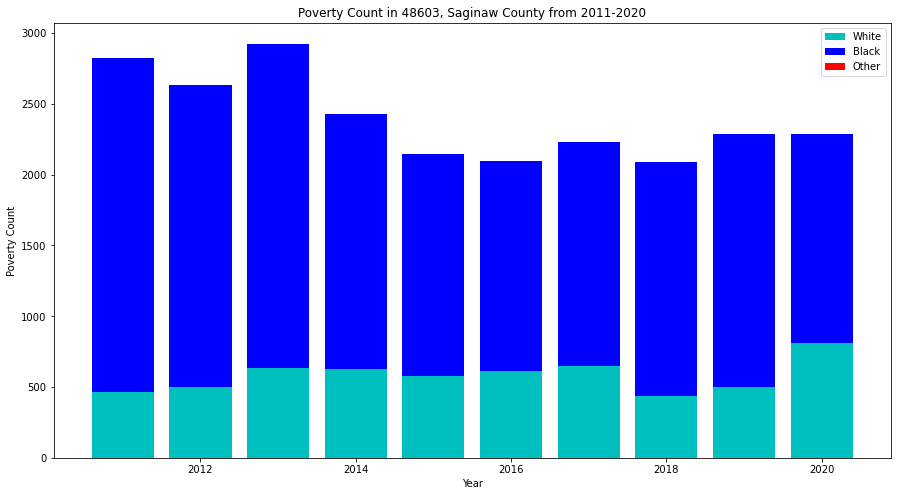

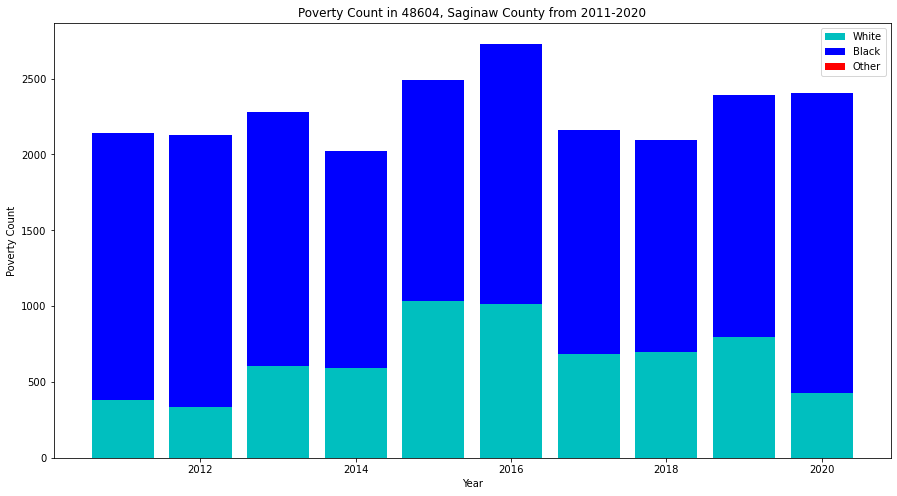

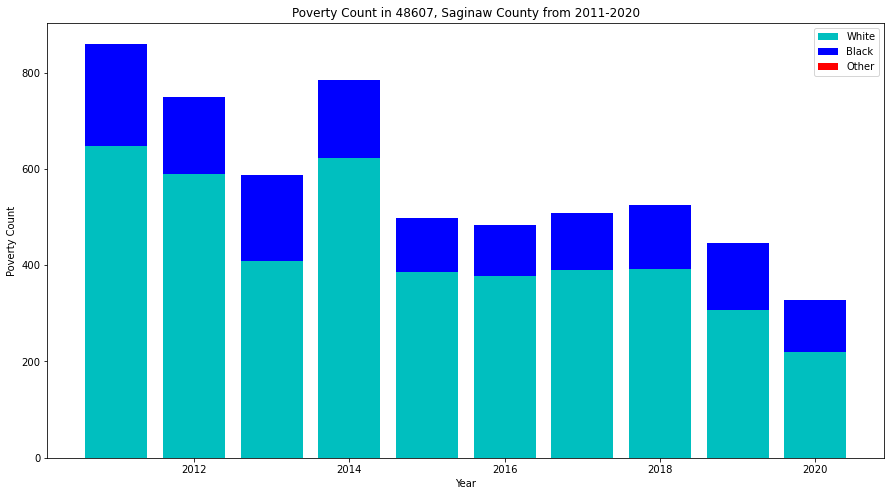

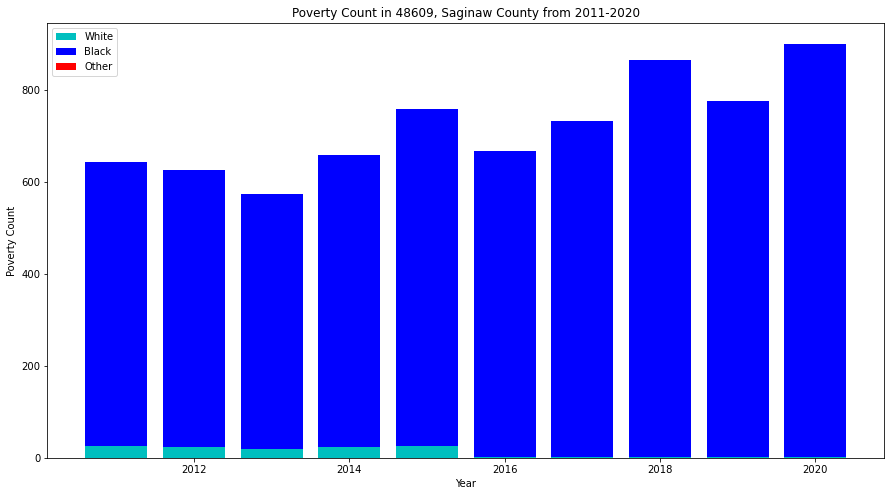

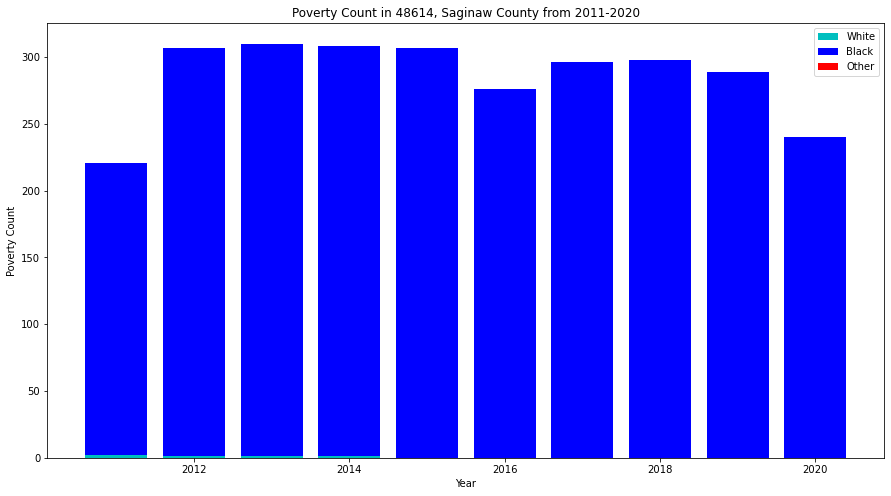

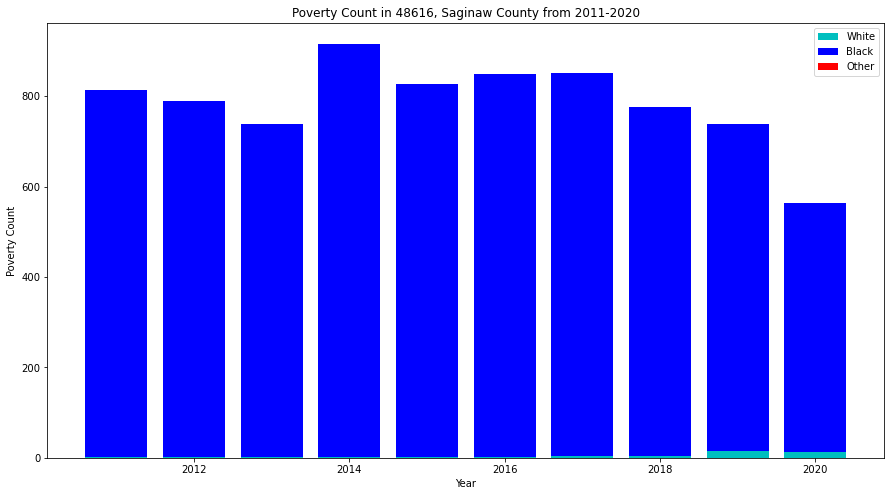

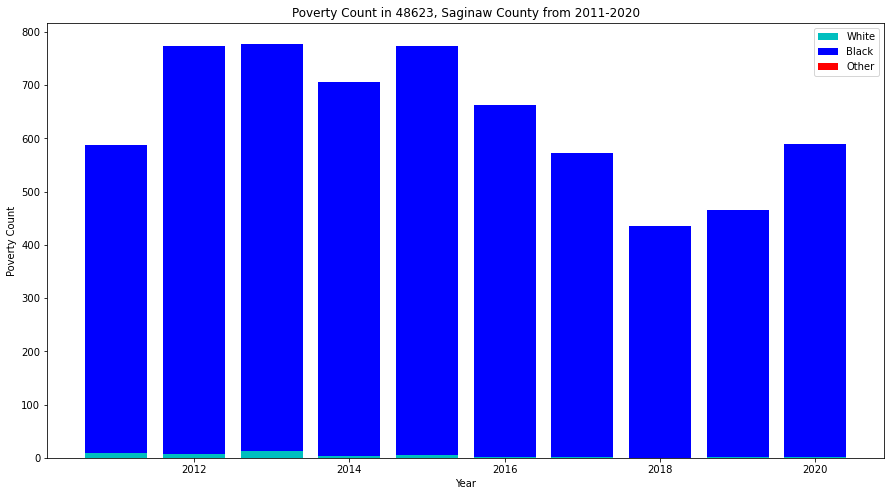

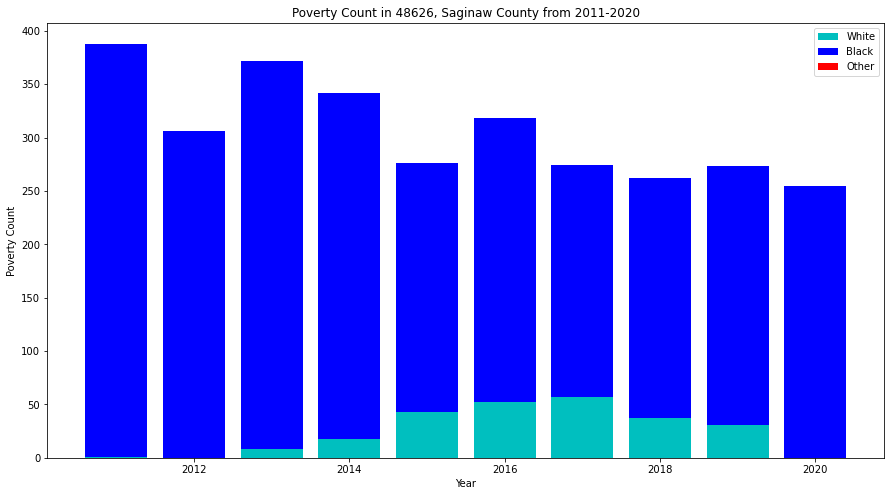

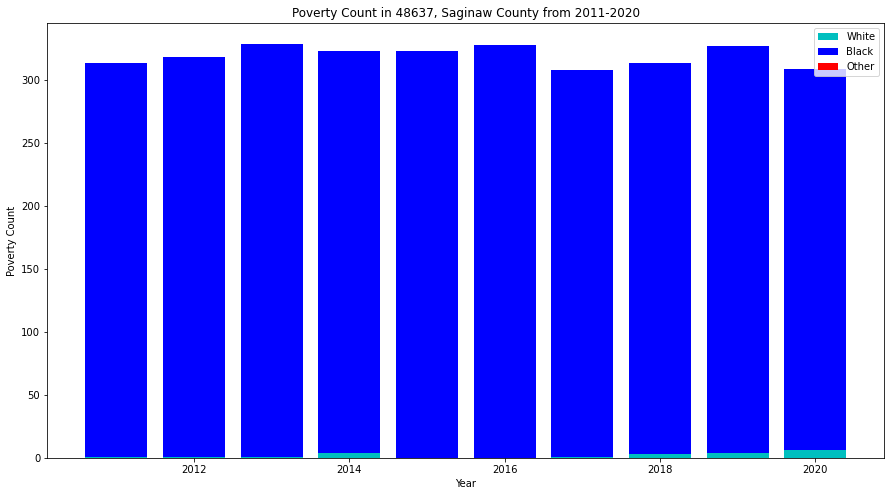

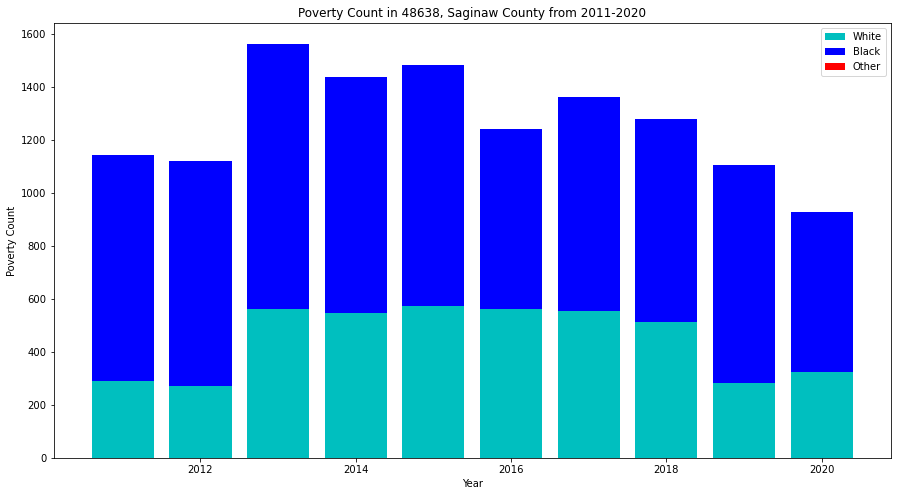

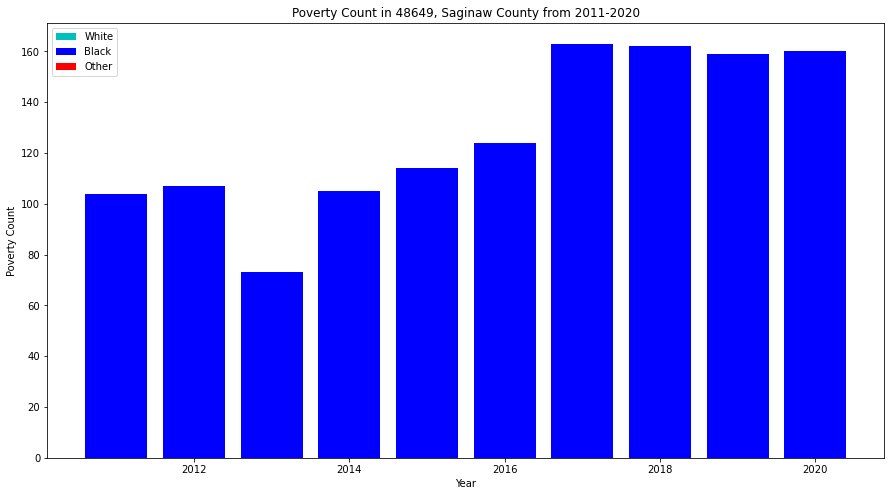

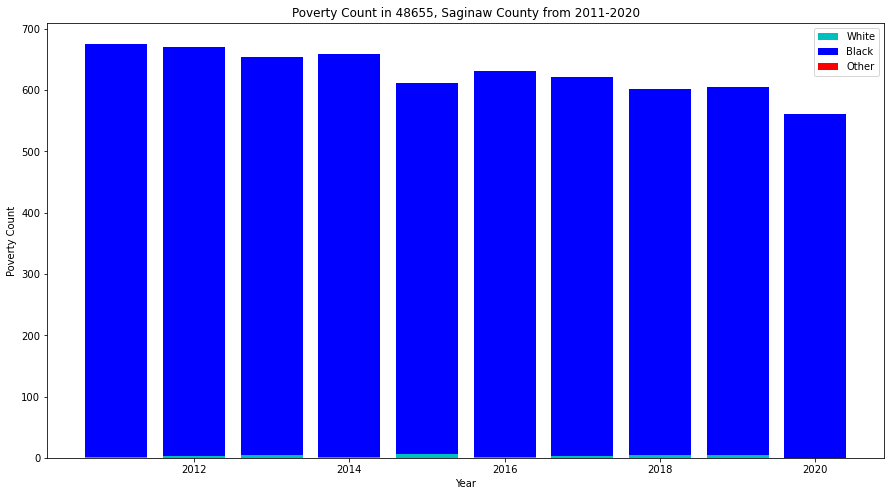

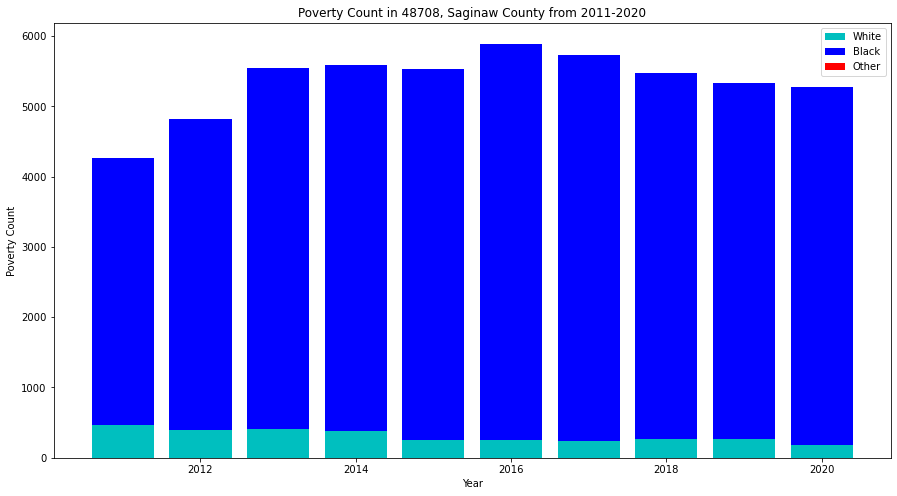

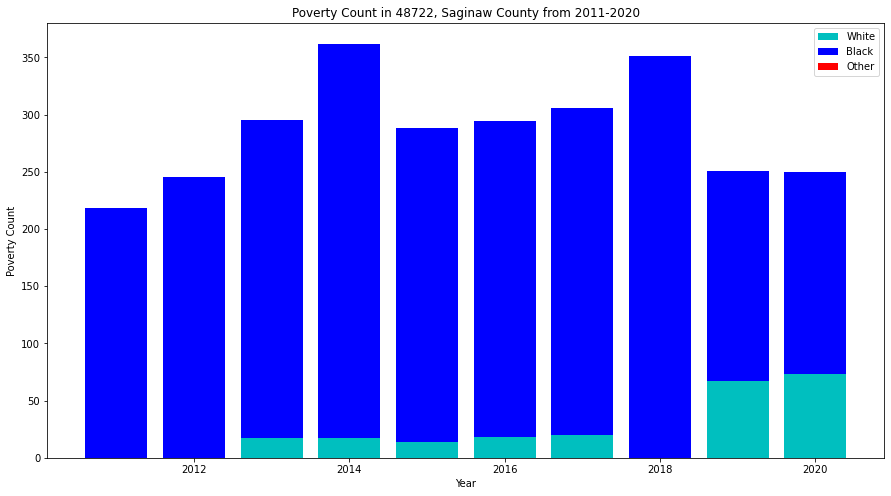

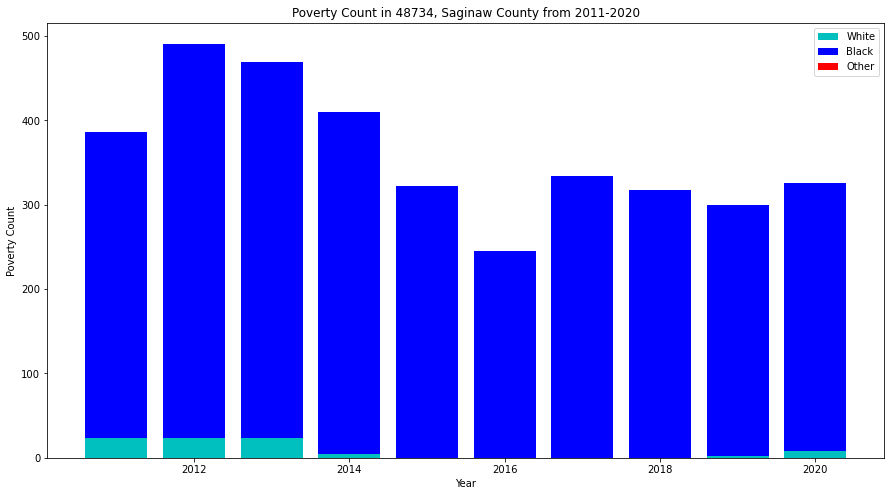

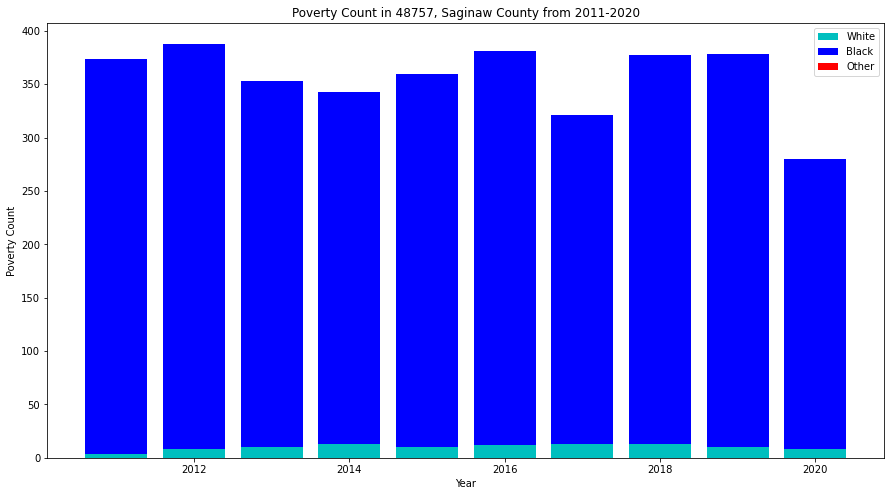

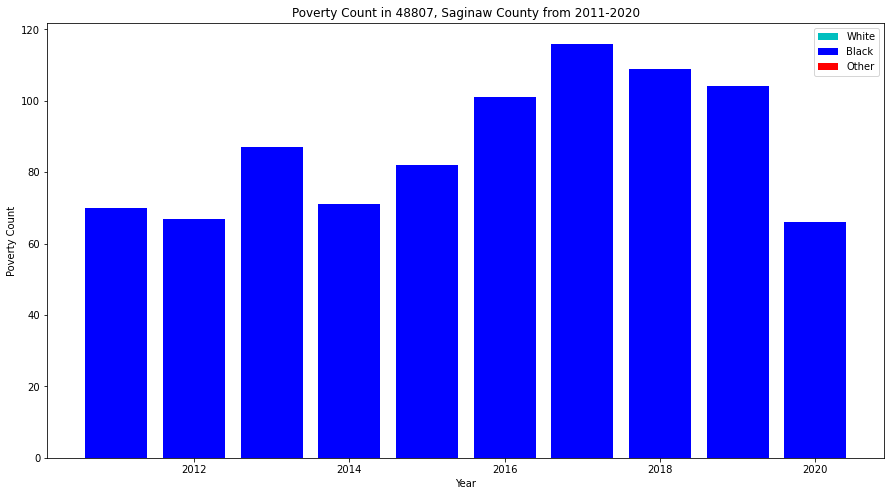

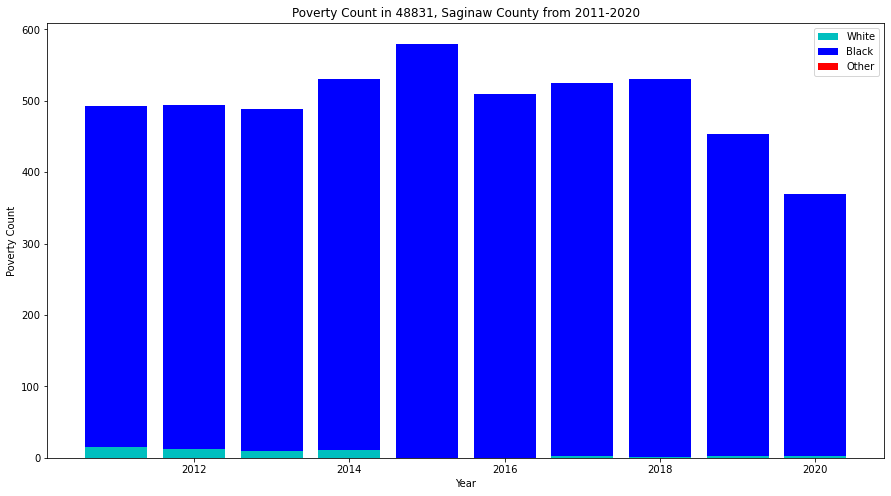

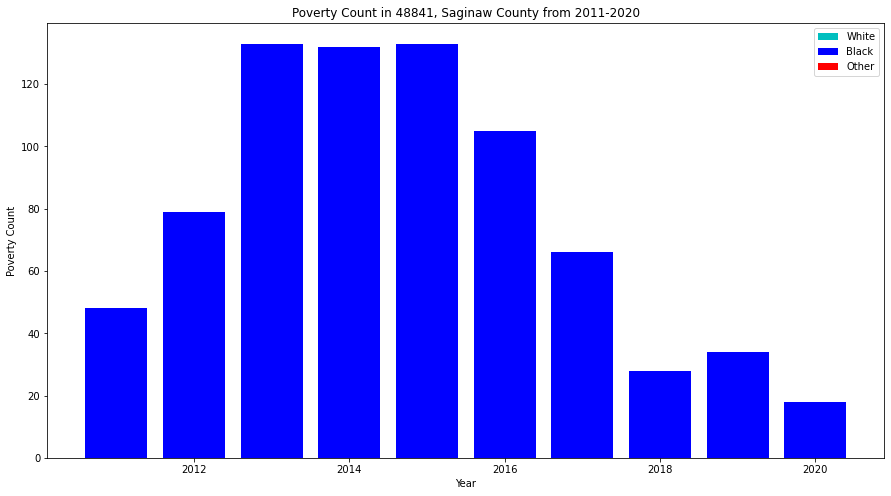

In [125]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(saginaw_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Saginaw")

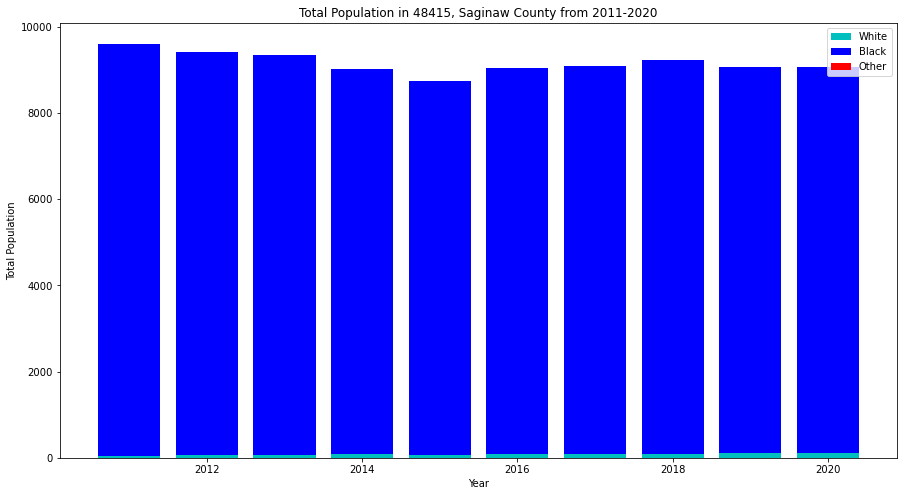

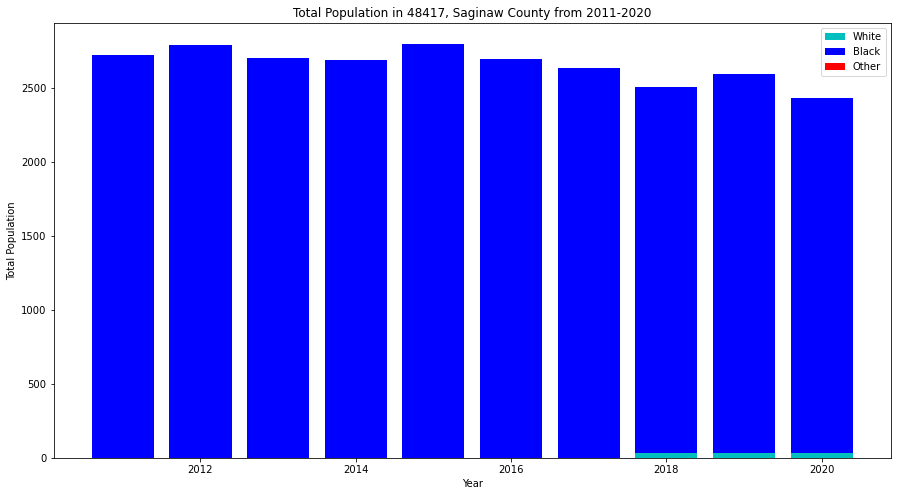

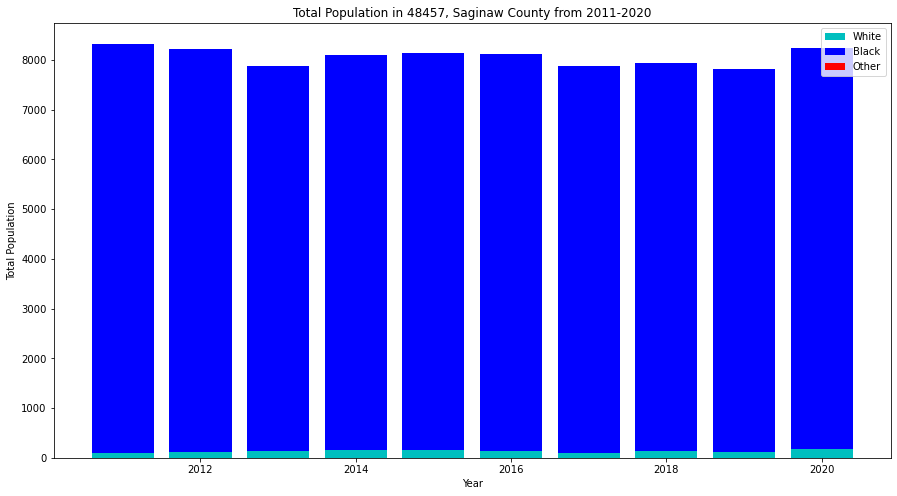

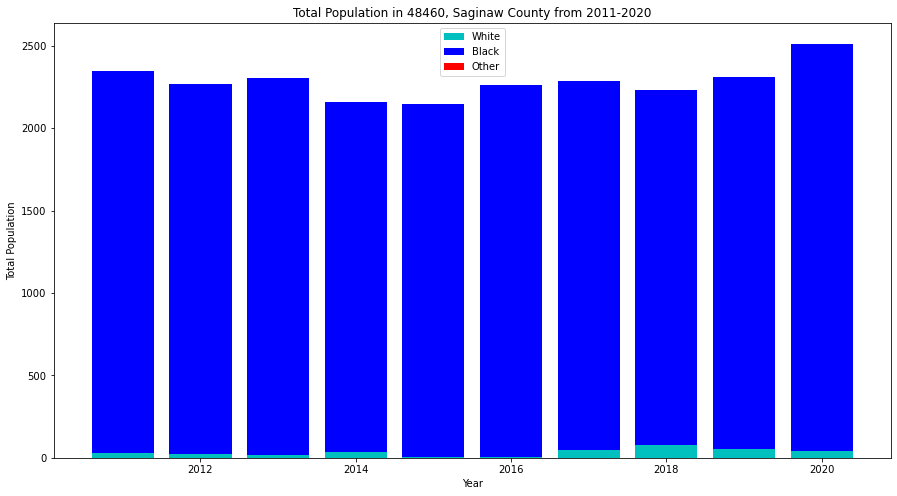

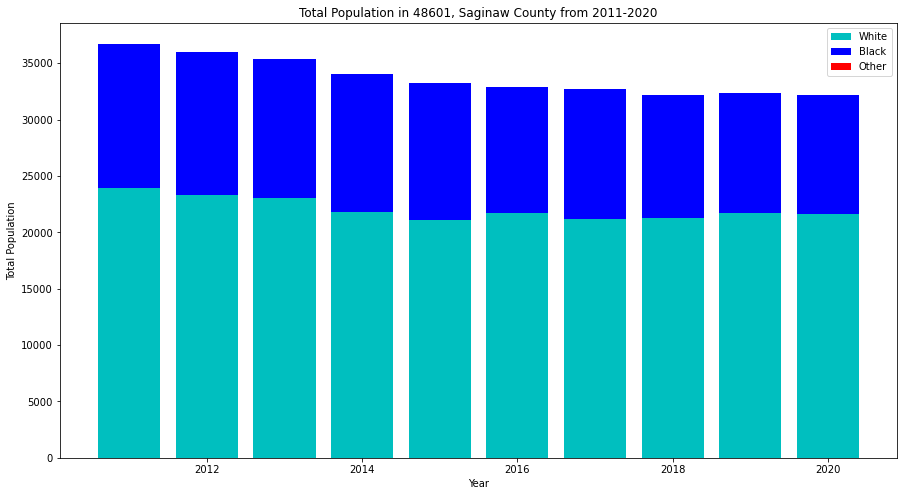

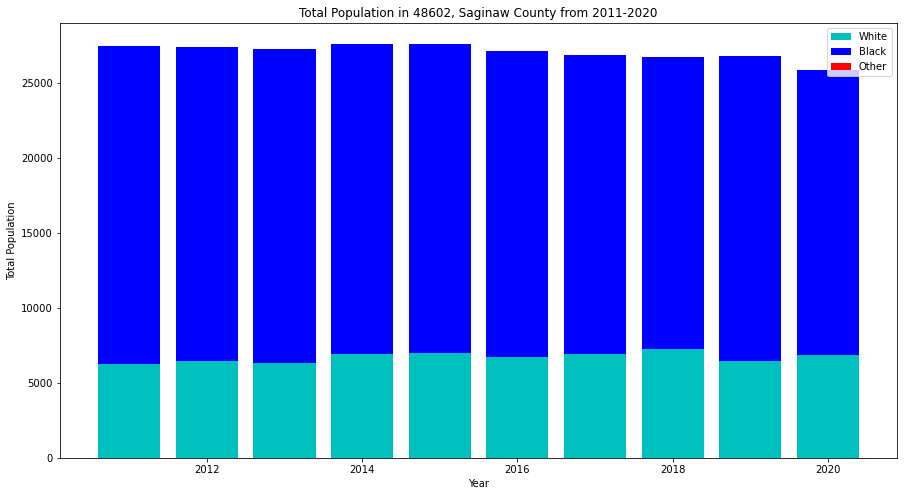

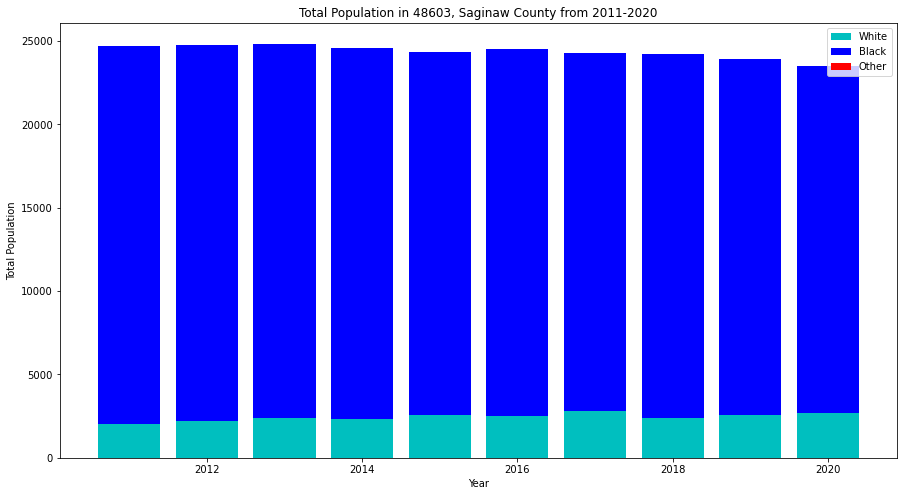

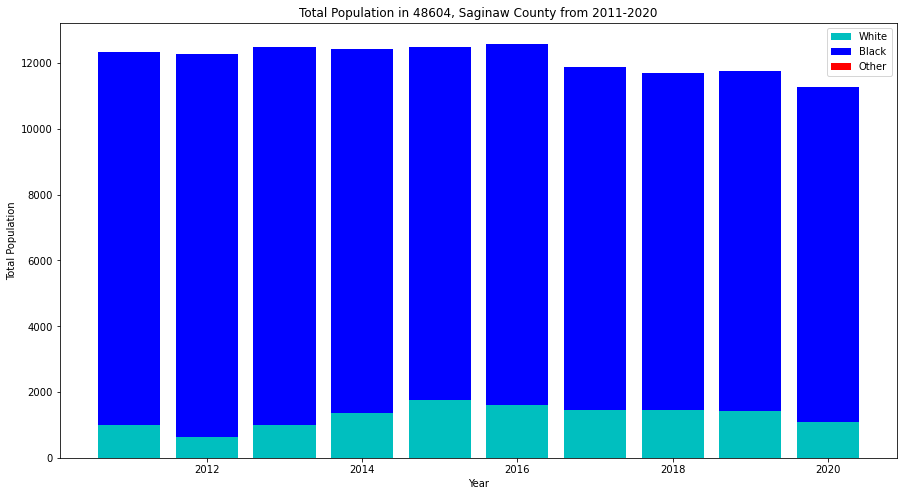

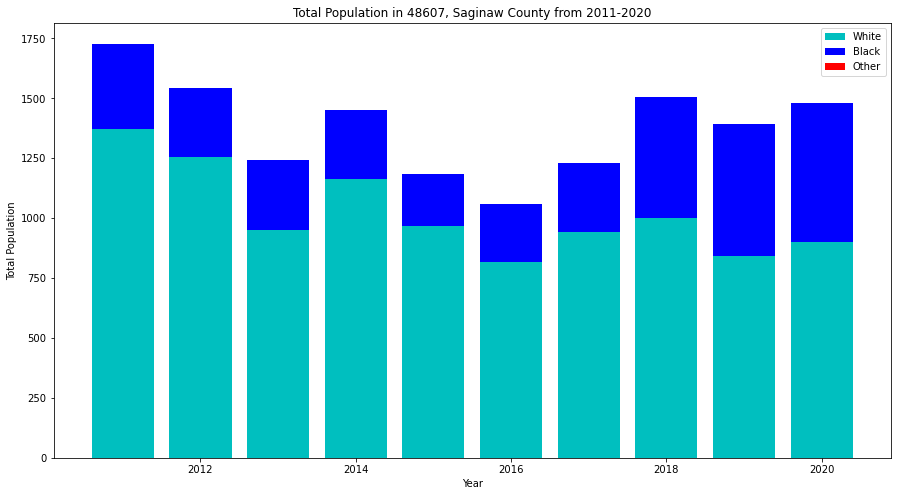

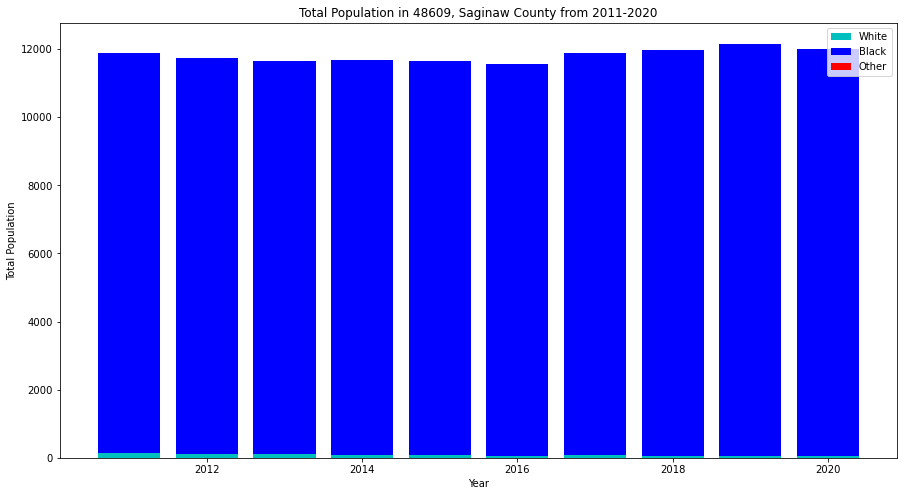

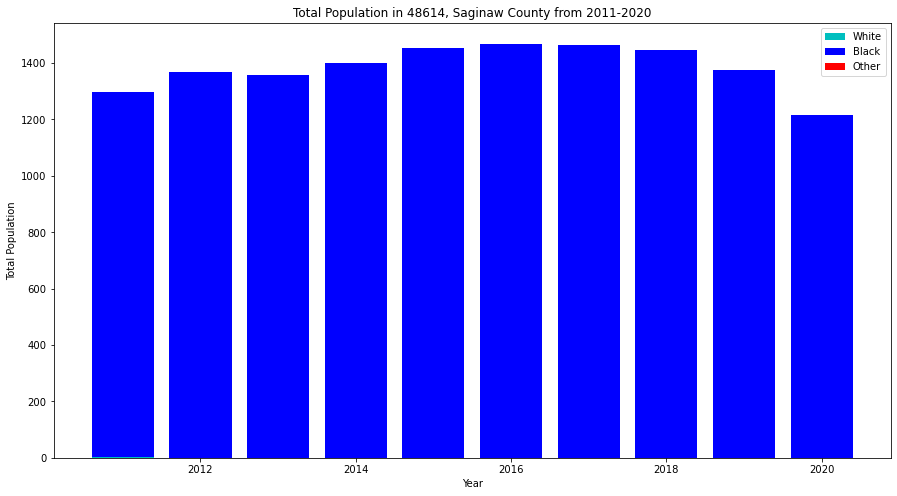

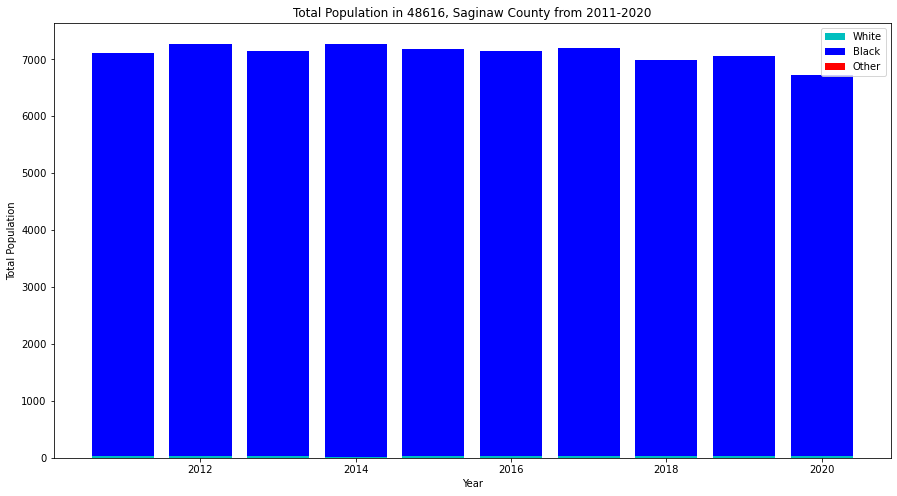

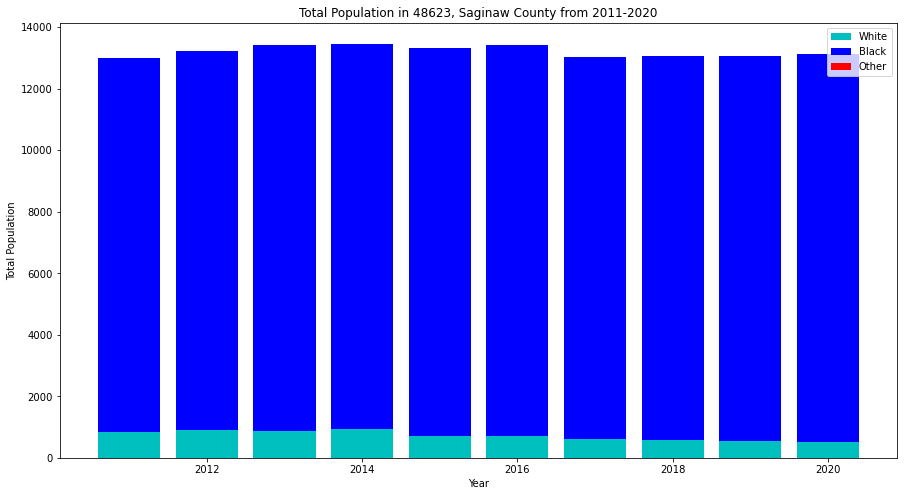

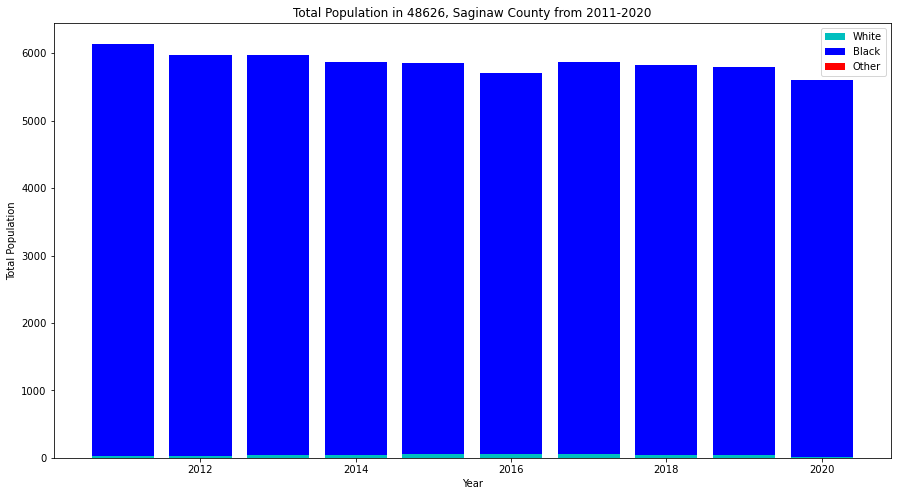

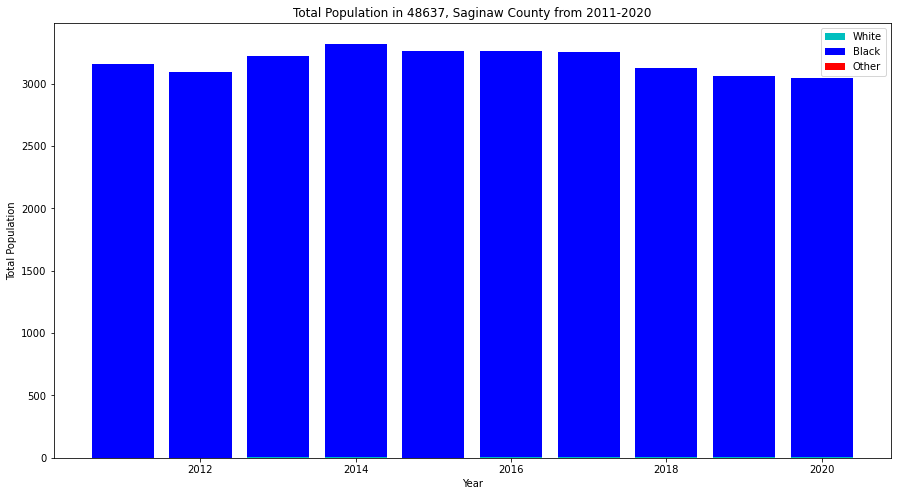

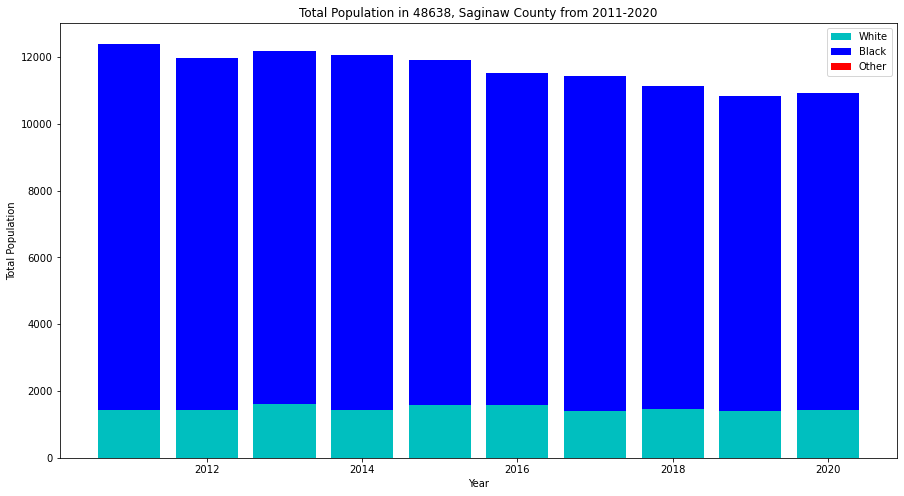

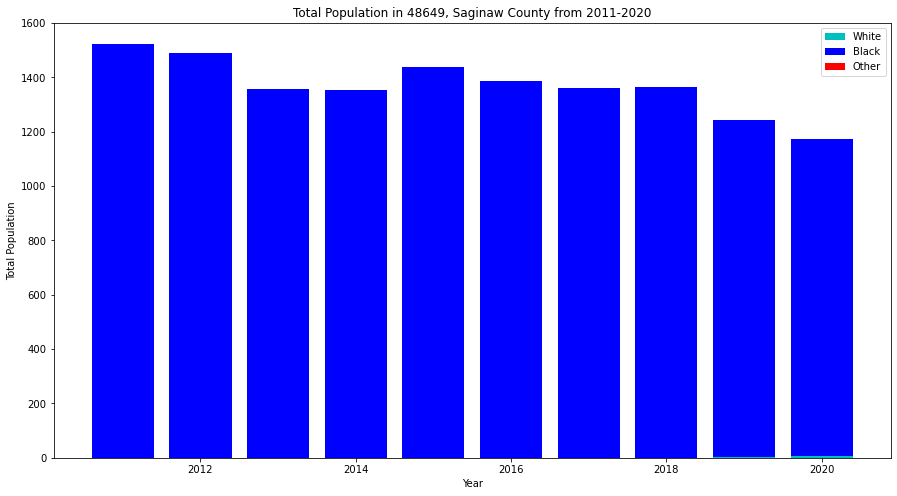

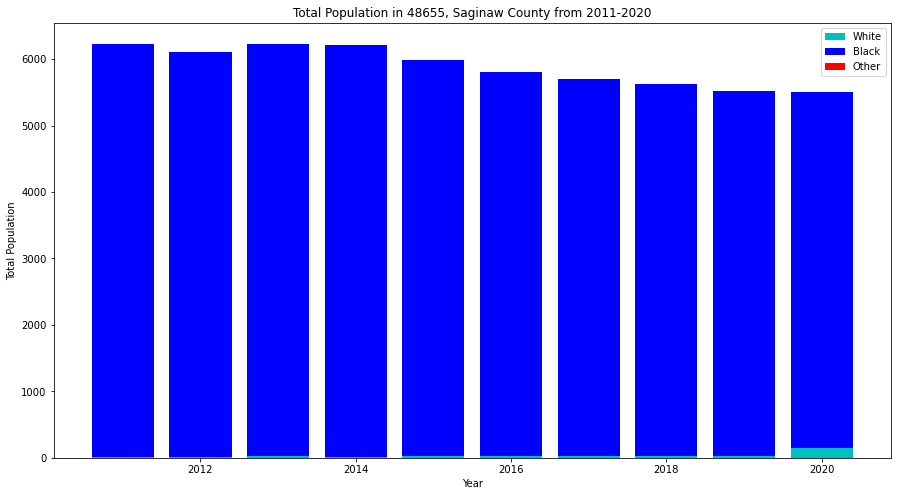

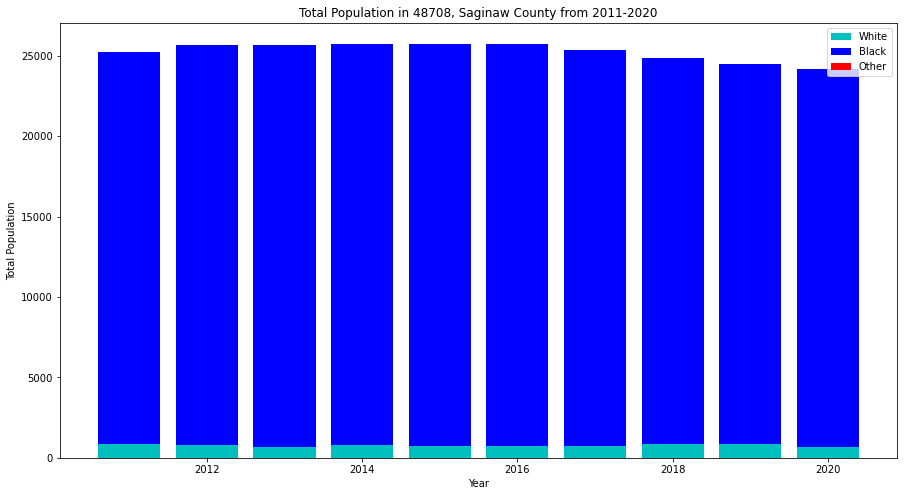

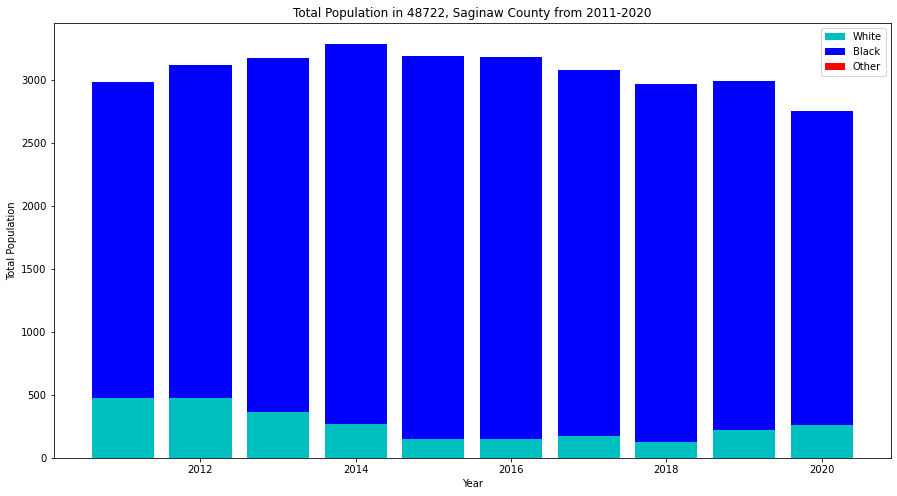

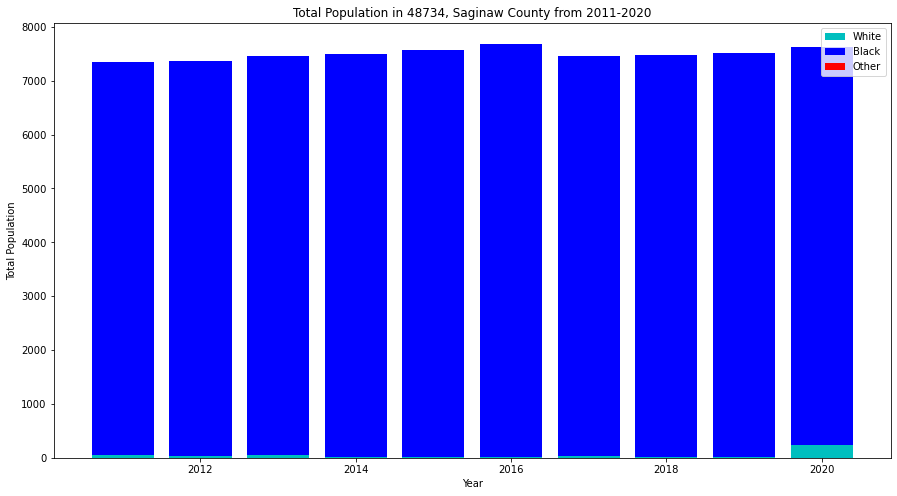

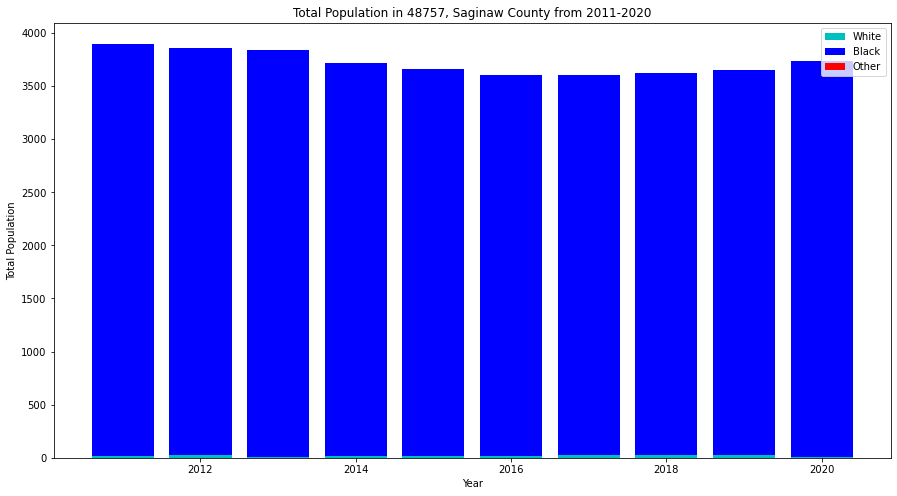

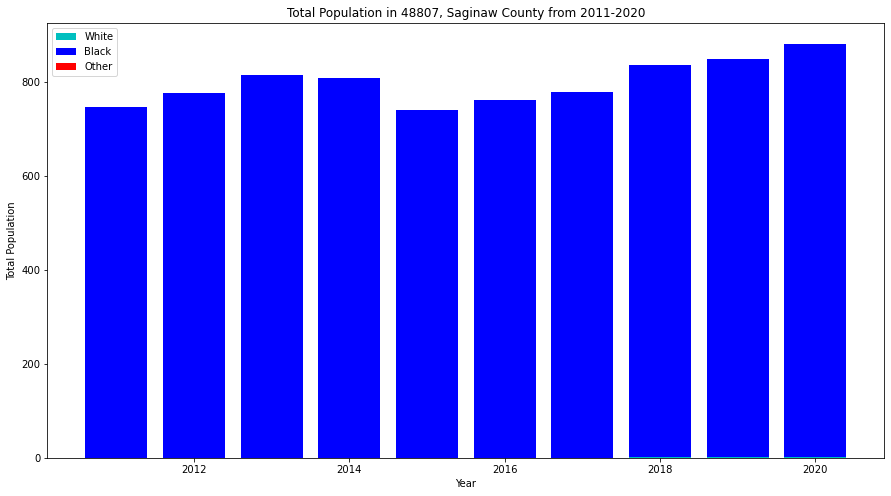

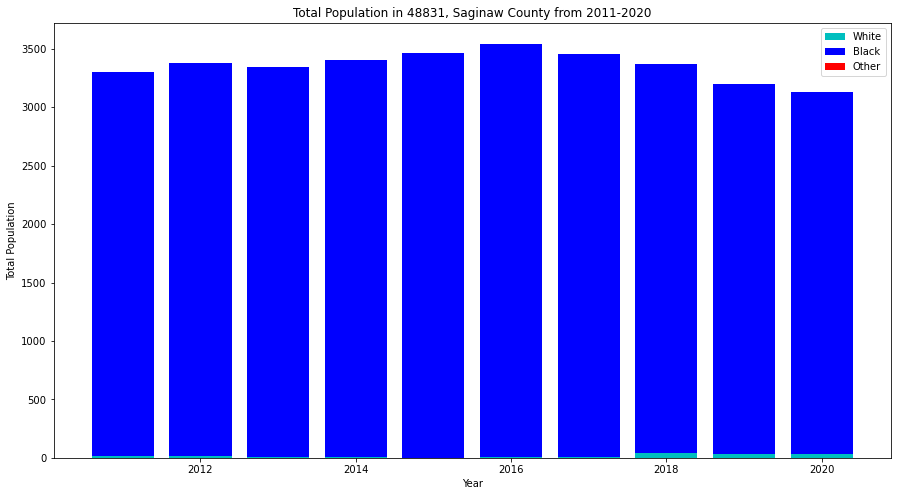

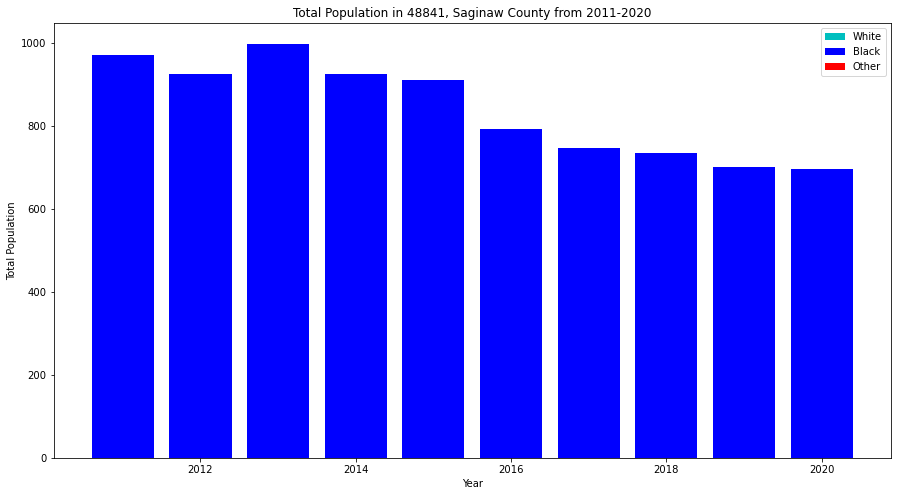

In [126]:
# Time analyses for population
time_analyses_stacked(saginaw_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Saginaw")

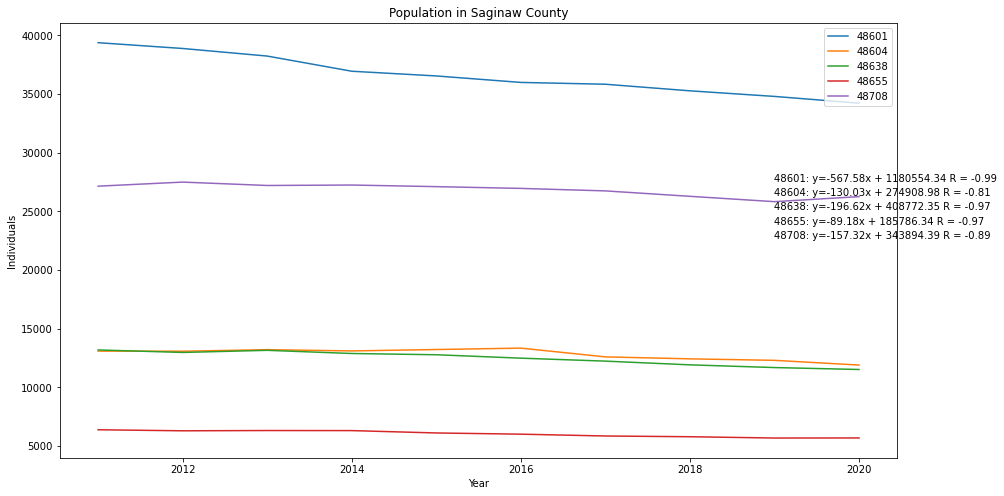

In [131]:
# Create initial plot ---Population
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .8) & (abs(equations_df["Slope"])> 80)]
equations_df = pd.merge(equations_df,saginaw_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Saginaw County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.show()

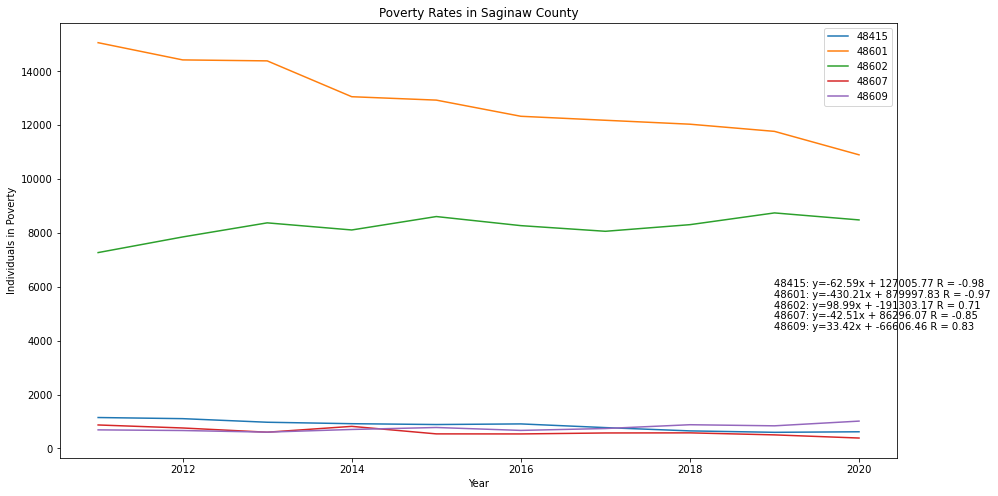

In [136]:
# Create initial plot ---Poverty
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .7) & (abs(equations2_df["Slope"])> 25)]
equations2_df = pd.merge(equations2_df,saginaw_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 6000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 400
plt.title("Poverty Rates in Saginaw County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.show()

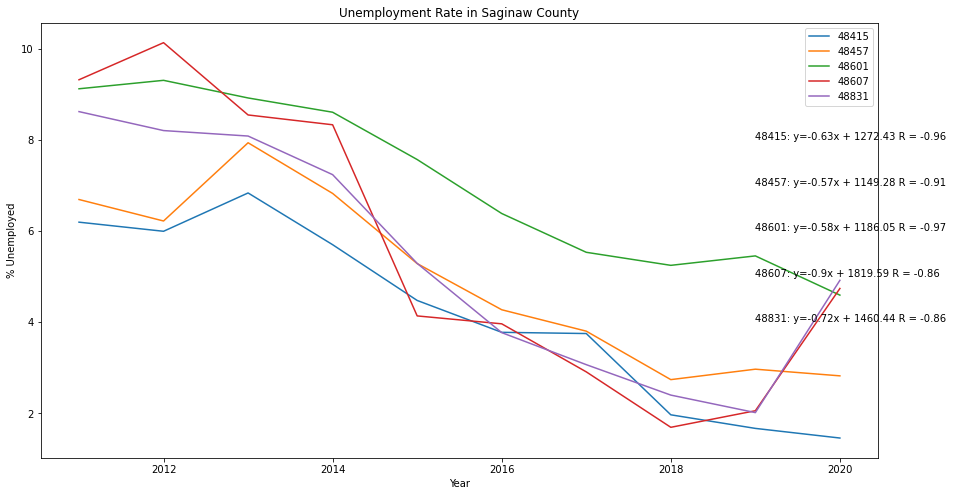

In [138]:
# Create initial plot --Unemployment
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .55)]
equations_df = pd.merge(equations_df,saginaw_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Saginaw County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.show()

# Combination Visualizations

# GIF Maps

In [ ]:
# Relocate needed module and import it (install as well)

In [ ]:
# Determine what specific visualizations to convert to map GIFs

In [ ]:
# Create maps by county, showing individual points per zipcode (heat map)

In [ ]:
# Export maps?